In [1]:
#https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb
from pycaret.regression import *
import pandas as pd
df = pd.read_csv('clean_data.csv')
df.head()

,avg_monthly_hrs,dept_id,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,filed_complaint
0,246.0,D00-OT,0.866838,6,0,medium,0.134415,Left,4.0,42.0,Female,Married,0
1,134.0,D00-OT,0.555718,2,0,low,0.511041,Left,3.0,23.0,Female,Unmarried,0
2,156.0,D00-SS,0.474082,2,0,medium,0.405101,Left,3.0,24.0,Female,Unmarried,1
3,256.0,D00-SP,0.961360,6,0,low,0.152974,Left,4.0,51.0,Female,Married,0
4,146.0,D00-SS,0.507349,2,0,medium,0.434845,Left,3.0,23.0,Female,Unmarried,0


In [3]:
#converting categorical columns to a sparse matrix
df.shape

(14116, 13)

In [7]:
data = df.sample(frac= 0.9, random_state = 2021)
data_unseen = df.drop(data.index)
data.reset_index(drop = True, inplace = True)
data_unseen.reset_index(drop = True, inplace = True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for prediction: ' + str(data_unseen.shape))

Data for Modeling: (12704, 13)
Unseen Data for prediction: (1412, 13)


In [8]:
exp_reg = setup(data = data, target = 'tenure', session_id = 2021)

,Description,Value
0,session_id,2021
1,Target,tenure
2,Original Data,"(12704, 13)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8892, 31)"


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8105,1.6686,1.2904,0.2688,0.2538,0.2560,0.1810
rf,Random Forest Regressor,0.8210,1.6743,1.2927,0.2661,0.2520,0.2572,0.2460
lightgbm,Light Gradient Boosting Machine,0.8184,1.7217,1.3112,0.2451,0.2526,0.2514,0.0970
gbr,Gradient Boosting Regressor,0.8283,1.7330,1.3156,0.2400,0.2524,0.2538,0.1100
xgboost,Extreme Gradient Boosting,0.8577,1.7976,1.3400,0.2113,0.2608,0.2644,0.2240
ridge,Ridge Regression,0.9585,1.9627,1.4005,0.1384,0.2714,0.2891,0.2780
lar,Least Angle Regression,0.9588,1.9627,1.4005,0.1384,0.2714,0.2892,0.0170
lr,Linear Regression,0.9588,1.9627,1.4005,0.1384,0.2714,0.2892,0.4060
br,Bayesian Ridge,0.9585,1.9629,1.4006,0.1383,0.2716,0.2889,0.0170
omp,Orthogonal Matching Pursuit,1.0321,2.0807,1.4419,0.0868,0.2804,0.3131,0.0150


In [10]:
models()  #the different models that are available at our disposal

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
#since extra tree regressor et performed the best using that for further evaluation and tuning
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8305,1.8362,1.3551,0.2245,0.2601,0.2528
1,0.8147,1.5313,1.2375,0.2813,0.2468,0.2507
2,0.8381,1.7815,1.3347,0.2550,0.2612,0.2621
3,0.7807,1.5414,1.2415,0.3107,0.2464,0.2507
4,0.8324,1.7179,1.3107,0.2435,0.2578,0.2645
5,0.7955,1.5681,1.2523,0.2986,0.2492,0.2556
6,0.7931,1.6539,1.2860,0.2683,0.2499,0.2516
7,0.7976,1.7256,1.3136,0.2950,0.2545,0.2481
8,0.7652,1.3945,1.1809,0.3224,0.2436,0.2515
9,0.8571,1.9358,1.3913,0.1889,0.2683,0.2725


In [13]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2021, verbose=0, warm_start=False)


In [14]:
tune_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9220,1.9976,1.4134,0.1563,0.2721,0.2719
1,0.9228,1.7349,1.3172,0.1858,0.2672,0.2800
2,0.9529,2.0057,1.4162,0.1612,0.2767,0.2870
3,0.8876,1.8477,1.3593,0.1737,0.2669,0.2710
4,0.9237,1.8984,1.3778,0.1640,0.2717,0.2816
5,0.8911,1.7502,1.3230,0.2172,0.2628,0.2702
6,0.8795,1.7979,1.3409,0.2046,0.2593,0.2685
7,0.9129,1.9391,1.3925,0.2078,0.2701,0.2682
8,0.8602,1.6702,1.2924,0.1884,0.2537,0.2652
9,0.9211,1.9712,1.4040,0.1741,0.2705,0.2810


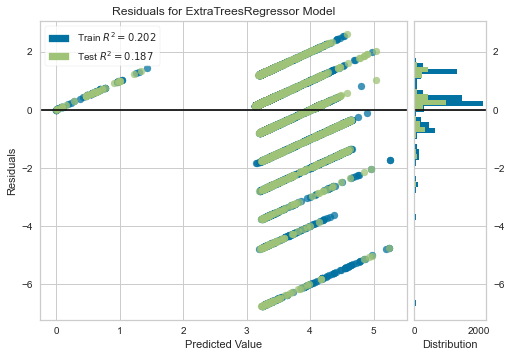

In [15]:
plot_model(tune_et)

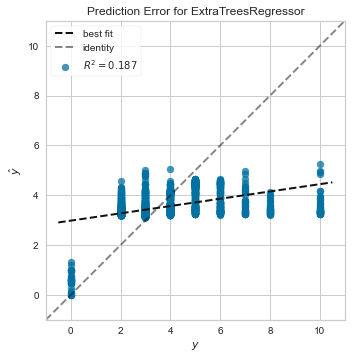

In [16]:
plot_model(tune_et, plot = 'error')

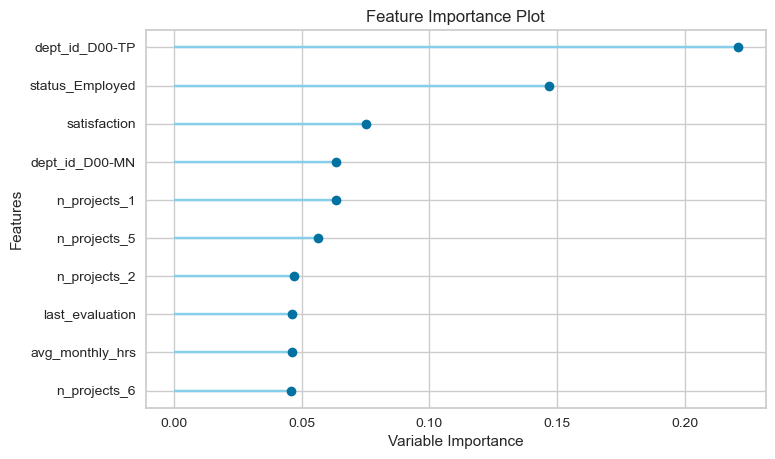

In [17]:
plot_model(tune_et, plot = 'feature')

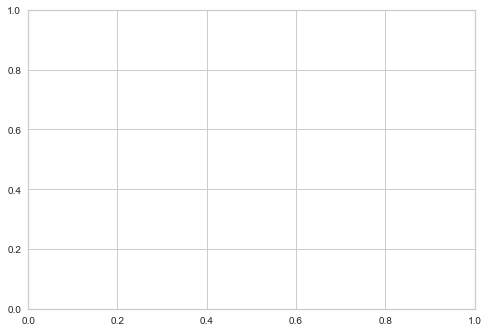

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

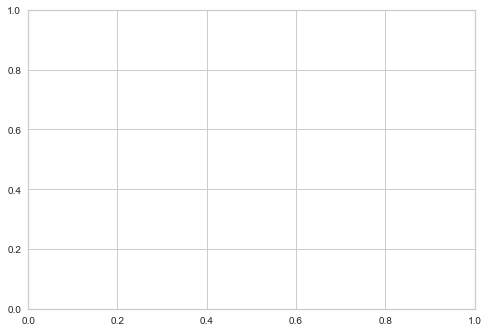

In [20]:
evaluate_model(tune_et);

In [22]:
final_et= finalize_model(tune_et)
print(final_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features='sqrt', max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.001, min_impurity_split=None,
                    min_samples_leaf=5, min_samples_split=9,
                    min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                    oob_score=False, random_state=2021, verbose=0,
                    warm_start=False)


In [23]:
predict_model(final_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.8824,1.7576,1.3258,0.1935,0.2665,0.2710


In [24]:
unseen_predictions = predict_model(final_et, data = data_unseen)
unseen_predictions.head()

,avg_monthly_hrs,dept_id,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,filed_complaint,Label
0,156.0,D00-SS,0.474082,2,0,medium,0.405101,Left,3.0,24.0,Female,Unmarried,1,3.212323
1,149.0,D00-AD,0.505405,2,0,low,0.451832,Left,3.0,43.0,Female,Married,0,3.340112
2,141.0,D00-SS,0.462141,2,0,low,0.435337,Left,3.0,25.0,Female,Unmarried,0,3.168242
3,129.0,D00-SS,0.718322,2,0,low,0.447517,Left,3.0,22.0,Female,Unmarried,0,3.177750
4,249.0,D00-SP,0.997662,4,0,low,0.805852,Left,5.0,22.0,Female,Unmarried,0,4.354702


In [ ]:
from pycaret.metrics import check_metric
check_metric(unseen_predictions.tenure, unseen_predictions.Label, )